In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_path = '/kaggle/input/neweyedata/new_eye_data/train'
val_path = '/kaggle/input/neweyedata/new_eye_data/val'
test_path = '/kaggle/input/neweyedata/new_eye_data/test'

batch_size = 16
img_height = 224
img_width = 224
input_shape = (img_height , img_width , 3)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=(0.8, 1.2),
    horizontal_flip=True,
    vertical_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    class_mode='binary'
)

validation_generator = valid_datagen.flow_from_directory(
    val_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    class_mode='binary'
)

print(train_generator.class_indices)

In [4]:
images, labels = next(train_generator)

{'Anemic': 0, 'Healthy': 1}


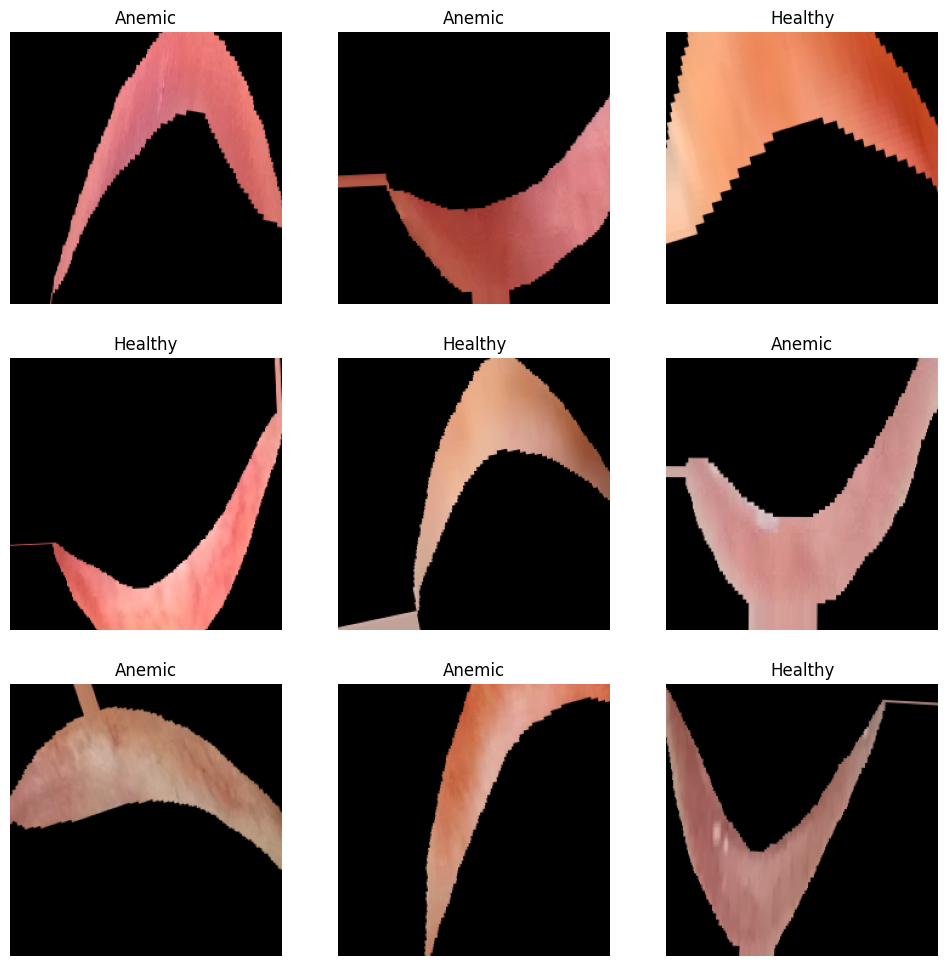

In [5]:
def plot_augmented_images(images, labels, class_indices):
    class_names = list(class_indices.keys())
    plt.figure(figsize=(12, 12))
    for i in range(min(len(images), 9)):  # Plot up to 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        class_idx = int(labels[i])  # Labels are not one-hot encoded
        plt.title(class_names[class_idx])
        plt.axis('off')
    plt.show()

print(train_generator.class_indices)
plot_augmented_images(images, labels, train_generator.class_indices)

In [6]:
def resnet50():
    base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    pred = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model_resnet50 = tf.keras.models.Model(inputs=base_model.input, outputs=pred)
    return model_resnet50

In [ ]:
model_resnet50 = resnet50()
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_resnet50.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model_resnet50.summary()

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=7, verbose=1, restore_best_weights=True)

history = model_resnet50.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=80,
    callbacks=[reduce_lr, early_stopping]
)

In [ ]:
def inception_v3():
    base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    pred = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model_inceptionv3 = tf.keras.models.Model(inputs=base_model.input, outputs=pred)
    return model_inceptionv3

model_inceptionv3 = inception_v3()
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_inceptionv3.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model_inceptionv3.summary()

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=7, verbose=1, restore_best_weights=True)

history = model_inceptionv3.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=80,
    callbacks=[reduce_lr, early_stopping]
)

In [ ]:
plt.plot(history.history['loss'] , label = 'train_loss')
plt.plot(history.history['val_loss'] , label = 'val_loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'] , label = 'train_acc')
plt.plot(history.history['val_accuracy'] , label = 'val_acc')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    class_mode='binary'
)

test_accu = model_inceptionv3.evaluate(test_generator)
print('The testing accuracy is :',test_accu[1]*100, '%')

In [ ]:
def inception_resnet_v2():
    base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    pred = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model_inception_resnet_v2 = tf.keras.models.Model(inputs=base_model.input, outputs=pred)
    return model_inception_resnet_v2

model_inception_resnet_v2 = inception_resnet_v2()
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model_inception_resnet_v2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_inception_resnet_v2.summary()

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

history = model_inception_resnet_v2.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=80,
    callbacks=[reduce_lr, early_stopping]
)

In [ ]:
plt.plot(history.history['loss'] , label = 'train_loss')
plt.plot(history.history['val_loss'] , label = 'val_loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'] , label = 'train_acc')
plt.plot(history.history['val_accuracy'] , label = 'val_acc')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    class_mode='binary'
)

test_accu = model_inception_resnet_v2.evaluate(test_generator)
print('The testing accuracy is :',test_accu[1]*100, '%')

In [27]:
def vgg19():
    base_model = tf.keras.applications.VGG19(weights = 'imagenet', include_top = False, input_shape=(224,224,3))
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    pred = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model_vgg19 = tf.keras.models.Model(inputs=base_model.input, outputs=pred)
    return model_vgg19

In [ ]:
model_vgg19 = vgg19()
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_vgg19.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model_vgg19.summary()

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience=10, verbose=1, restore_best_weights=True)

history = model_vgg19.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=80,
    callbacks=[reduce_lr, early_stopping]
)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *

class CustomModel():
    def __init__(self, img_height, img_width):
        self.conv1 = Conv2D(64, (3, 3), activation="relu", input_shape=(img_height, img_width, 3))
        self.pool1 = MaxPooling2D(pool_size=(2, 2))
        self.conv2 = Conv2D(64, (3, 3), activation="relu")
        self.pool2 = MaxPooling2D(pool_size=(2, 2))
        self.conv3 = Conv2D(128, (3, 3), activation="relu")
        self.pool3 = MaxPooling2D(pool_size=(2, 2))
        self.conv4 = Conv2D(128, (3, 3), activation="relu")
        self.pool4 = MaxPooling2D(pool_size=(2, 2))
        self.flatten = Flatten()
        self.dense1 = Dense(256, activation='relu')
        self.dense2 = Dense(256, activation='relu')
        self.dense3 = Dense(1, activation='sigmoid')

    def call(self):
        self.inp = Input(shape=(img_height, img_width, 3))
        x = self.conv1(self.inp)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.pool3(x)
        x = self.conv4(x)
        x = self.pool4(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        final = self.dense3(x)
        model = Model(inputs = self.inp, outputs = final)
        return model

img_height = 156
img_width = 156

# Initialize and build the model
m = CustomModel(img_height, img_width)
model = m.call()

# Compile the model
adam = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience=7, verbose=1, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=80,
    callbacks=[reduce_lr, early_stopping]
)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Residual block with two convolutional layers
def residual_block(x, filters, kernel_size=3, stride=1, downsample=False):
    shortcut = x
    if downsample:
        shortcut = layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)
    
    # Main path
    x = layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    x = layers.Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    
    # Add shortcut and main path
    x = layers.add([x, shortcut])
    x = layers.ReLU()(x)
    
    return x

# Building ResNet-18 architecture
def build_resnet18(input_shape):
    inputs = layers.Input(shape=input_shape)
    
    # Initial convolutional layer
    x = layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
    
    # Residual blocks
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    
    x = residual_block(x, 128, stride=2, downsample=True)
    x = residual_block(x, 128)
    
    x = residual_block(x, 256, stride=2, downsample=True)
    x = residual_block(x, 256)
    
    x = residual_block(x, 512, stride=2, downsample=True)
    x = residual_block(x, 512)
    
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    
    model = models.Model(inputs, outputs)
    return model

input_shape = (224, 224, 3)

model_resnet18 = build_resnet18(input_shape)

model_resnet18.summary()

In [35]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_resnet18.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience=10, verbose=1, restore_best_weights=True)

history = model_resnet18.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[reduce_lr, early_stopping]
)

In [ ]:
plt.plot(history.history['loss'] , label = 'train_loss')
plt.plot(history.history['val_loss'] , label = 'val_loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'] , label = 'train_acc')
plt.plot(history.history['val_accuracy'] , label = 'val_acc')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    class_mode='binary'
)

test_accu = model_resnet18.evaluate(test_generator)
print('The testing accuracy is :',test_accu[1]*100, '%')

In [ ]:
def mobilenet_v2():
    base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    pred = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model_mobilenet_v2 = tf.keras.models.Model(inputs=base_model.input, outputs=pred)
    return model_mobilenet_v2

model_mobilenet_v2 = mobilenet_v2()
model_mobilenet_v2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model_mobilenet_v2.summary()

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience=10, verbose=1, restore_best_weights=True)

history = model_mobilenet_v2.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[reduce_lr, early_stopping]
)

In [ ]:
import tensorflow as tf

def efficientnet_b0():
    base_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    pred = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model_efficientnet_b0 = tf.keras.models.Model(inputs=base_model.input, outputs=pred)
    return model_efficientnet_b0

model_efficientnet_b0 = efficientnet_b0()
model_efficientnet_b0.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model_efficientnet_b0.summary()

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', min_delta = 0.0001, patience=10, verbose=1, restore_best_weights=True)

history = model_efficientnet_b0.fit(train_generator, validation_data=validation_generator, epochs=50, callbacks=[reduce_lr, early_stopping])

In [ ]:
def densenet121():
    base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    pred = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model_densenet121 = tf.keras.models.Model(inputs=base_model.input, outputs=pred)
    return model_densenet121

model_densenet121 = densenet121()
model_densenet121.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model_densenet121.summary()

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', min_delta = 0.0001, patience=10, verbose=1, restore_best_weights=True)

history = model_densenet121.fit(train_generator, validation_data=validation_generator, epochs=50, callbacks=[reduce_lr, early_stopping])

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    class_mode='binary'
)

test_accu = model_densenet121.evaluate(test_generator)
print('The testing accuracy is :',test_accu[1]*100, '%')

In [ ]:
test_accuracy = test_accu[1]
test_loss = test_accu[0]

# Plotting Test Accuracy and Loss
plt.figure(figsize=(8, 4))

# Test Accuracy
plt.subplot(1, 2, 1)
plt.bar('Test Accuracy', test_accuracy, color='green', width=0.4)
plt.ylim(0, 1)
plt.title('Test Accuracy')
plt.ylabel('Accuracy')

# Test Loss
plt.subplot(1, 2, 2)
plt.bar('Test Loss', test_loss, color='red', width=0.4)
plt.title('Test Loss')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

In [48]:
model_densenet121.save('eye_model_densenet121.h5')

In [ ]:
def nasnet_mobile():
    base_model = tf.keras.applications.NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    pred = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model_nasnet_mobile = tf.keras.models.Model(inputs=base_model.input, outputs=pred)
    return model_nasnet_mobile

model_nasnet_mobile = nasnet_mobile()
model_nasnet_mobile.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model_nasnet_mobile.summary()

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', min_delta = 0.0001, patience=10, verbose=1, restore_best_weights=True)

history = model_nasnet_mobile.fit(train_generator, validation_data=validation_generator, epochs=50, callbacks=[reduce_lr, early_stopping])